# Analytics

### Correção da avaliação 2 - Regressão Linear

**Embora isto seja um Jupyter Notebook, o código está em R!!!** (só lembrando...)

In [ ]:
# Setup
## Se o pacote PNADcIBGE não estiver instalado, faça a instalação
if (! "PNADcIBGE" %in% installed.packages()) install.packages("PNADcIBGE")
if (! "car" %in% installed.packages()) install.packages("car")

# Carrega o Pacote necessário
library(PNADcIBGE)
library(dplyr)
library(car)

# Pega a pnad
pnad = get_pnadc(2019, 2, 
                 vars = c("Ano", "Trimestre", "UF", "Capital", "UPA", "Estrato", "V1022", "V1028", "V2007",
                          "V2009", "V2010", "VD3005", "VD4016", "VD4019", "VD4031"))

# Verifica - cria um objeto survey design
pnad

# Isola o banco de dados para análises
bd = pnad$variables %>% as_tibble()

# Coloca anos de escolaridade como numérica
bd$anosesco = as.integer(bd$VD3005) - 1

# Seleciona apenas pessoas entre 25 e 60 anos
bd = bd %>% 
  filter(V2009 > 24 & V2009 < 61)

# Tirando uma amostra aleatória de 10000 casos
set.seed(123)
bd = bd %>% 
  sample_n(10000)

In [3]:
# Verifica
bd

Ano,Trimestre,UF,Capital,UPA,Estrato,V1022,V1027,V1028,V1029,posest,V2007,V2009,V2010,VD3005,VD4016,VD4019,VD4031,anosesco
<chr>,<chr>,<fct>,<fct>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
2019,2,São Paulo,NA,350468381,3521011,Urbana,1221.64981,1359.6100,9470747,352,Homem,43,Parda,16 anos ou mais de estudo,4000,4000,40,16
2019,2,Minas Gerais,NA,310207553,3156011,Urbana,701.03981,821.1276,15684472,314,Homem,31,Parda,11 anos de estudo,1300,1300,60,11
2019,2,Minas Gerais,NA,310013743,3155021,Rural,203.17073,237.9738,15684472,314,Mulher,25,Branca,12 anos de estudo,NA,NA,14,12
2019,2,Rio de Janeiro,NA,330113072,3321012,Urbana,319.53425,417.6109,5920540,332,Mulher,51,Parda,12 anos de estudo,1500,1500,44,12
2019,2,Santa Catarina,NA,420105712,4220011,Urbana,254.77330,303.1692,543674,422,Homem,50,Branca,6 anos de estudo,5000,5000,44,6
2019,2,Minas Gerais,NA,310022354,3156012,Urbana,550.60746,644.9263,15684472,314,Homem,58,Parda,5 anos de estudo,NA,NA,NA,5
2019,2,São Paulo,NA,350600130,3555012,Urbana,981.81076,1117.9728,24149827,354,Homem,38,Branca,8 anos de estudo,1500,1500,40,8
2019,2,Maranhão,NA,210058787,2152022,Rural,92.13962,113.8951,5413580,214,Mulher,56,Parda,5 anos de estudo,NA,NA,NA,5
2019,2,Ceará,NA,230067326,2354012,Urbana,209.46898,248.4403,5158372,234,Mulher,50,Parda,Sem instrução e menos de 1 ano de estudo,NA,NA,NA,0


---
#### 1) Estime uma regressão tendo como variável resposta o logaritmo natural da renda (VD4019) e a idade e os anos de escolaridade como preditores. Verifique com gráficos de avaliação os pressupostos da HOMOSCEDASTICIDADE, da INDEPENDÊNCIA DOS ERROS e com a função vif() do pacote 'car' verifique a AUSÊNCIA DE MULTICOLINEARIDADE. O que podemos dizer sobre o modelo estimado?

a) O modelo possui heteroscedasticidade

b) O modelo possui uma ligeira dependência dos erros

c) O modelo possui multicolinearidade

d) Nenhuma das anteriores


Call:
lm(formula = log(VD4019) ~ V2009 + anosesco, data = bd)

Coefficients:
(Intercept)        V2009     anosesco  
    5.33236      0.01748      0.11397  

   V2009 anosesco 
 1.07435  1.07435 


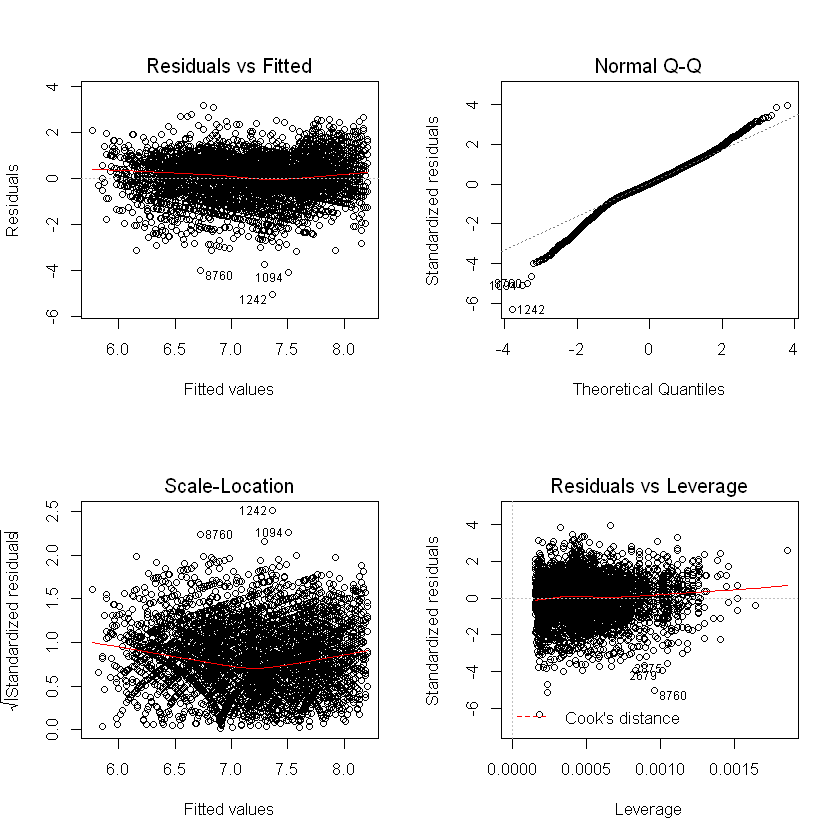

In [5]:
fit1 = lm(log(VD4019) ~ V2009 + anosesco, data=bd)
print(fit1)

par(mfrow=c(2,2))
plot(fit1)
par(mfrow=c(1,1))

print(vif(fit1))

Resposta Correta: **Letra D - Nenhuma das anteriores**.

Os pressupostos da homoscedasticidade e da dependência dos erros podem ser verificados no primeiro gráfico de avaliação. Percebemos que a variância do erro em torno da média ao longo de todo o eixo x está suficientemente constante. Com isso, percebemos que o erro está homoscedástico. Da mesma forma, o gráfico apresenta uma correção aparentemente próxima de zero (pontos dispostos de maneira aleatória) indicando não dependência do erro.

Através da análise VIF podemos verificar a presença de multicolinearidade. O valor crítico adotado é 10 sendo que um VIF maior que 10 indica multicolinearidade. Como ambos estão próximos a 1, o modelo não possui multincolinearidade.

---
#### 2) O que podemos dizer sobre o o poder explicativo desse modelo?
a) O modelo explica 79,94% da variância da renda

b) O modelo explica 12,01% da variância da renda

c) O modelo explica 26,71% da variância da renda

d) Nenhuma das demais respostas

In [6]:
summary(fit1)


Call:
lm(formula = log(VD4019) ~ V2009 + anosesco, data = bd)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0618 -0.4206  0.0181  0.4875  3.1536 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.332361   0.055629   95.86   <2e-16 ***
V2009       0.017483   0.001051   16.63   <2e-16 ***
anosesco    0.113974   0.002333   48.86   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7994 on 6584 degrees of freedom
  (3413 observations deleted due to missingness)
Multiple R-squared:  0.2673,	Adjusted R-squared:  0.2671 
F-statistic:  1201 on 2 and 6584 DF,  p-value: < 2.2e-16


Resposta Correta: **Letra C - 26,71% da variância da renda**.

O percentual de variância explicada pode ser observado no $R^2$ ajustado, também conhecido como *coeficiente de determinação*. O valor de 0.2671 indica 26,71% de variância explicada.

---
#### 3) O intercepto desse modelo faz sentido? Existe algo que possa ser feito a respeito?
a) Faz sentido. Não há nada para melhorar.

b) Faz sentido mas poderíamos melhorar inserindo a idade ao quadrado.

c) Não faz sentido. Não há nada para melhorar.

d) Não faz sentido. Poderíamos incluir a idade centralizada na média.

Reposta Correta: **Letra D - Não faz sentido. Poderíamos incluir a idade centralizada na média.**

O intercepto de um modelo de regressão linear indica o valor esperado de y quando x é 0, ou $E(y|x=0)$. Nesse caso não faz sentido esperarmos valor de renda para bebês ou crianças. A melhor alternativa é centralizar a idade na média de modo que o intercepto represente a renda esperada para a renda média.

---
#### 4) Implemente a solução que você propôs na pergunta anterior. O que muda no ajuste do modelo?
a) O poder explicativo do modelo aumenta

b) O poder explicativo do modelo diminui

c) O poder explicativo do modelo fica igual

In [7]:
bd$idadecen = bd$V2009 - mean(bd$V2009, na.rm=TRUE)

fit2 = lm(log(VD4019) ~ idadecen + anosesco, data=bd)
summary(fit2)


Call:
lm(formula = log(VD4019) ~ idadecen + anosesco, data = bd)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0618 -0.4206  0.0181  0.4875  3.1536 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.060114   0.026036  232.76   <2e-16 ***
idadecen    0.017483   0.001051   16.63   <2e-16 ***
anosesco    0.113974   0.002333   48.86   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7994 on 6584 degrees of freedom
  (3413 observations deleted due to missingness)
Multiple R-squared:  0.2673,	Adjusted R-squared:  0.2671 
F-statistic:  1201 on 2 and 6584 DF,  p-value: < 2.2e-16


Resposta Correta: **Letra C - O poder explicativo do modelo fica igual.**

O motivo de centralizar a idade na média é obter uma estimativa de intercepto que faça sentido para a interpretação. Fora isso, o poder explicativo do modelo não é alterado em nada pois a relação entre as variáveis é mantida.

---
#### 5) Faça um gráfico que apresente a média do logaritmo natural da renda para cada idade entre 25 a 60 anos. O que podemos dizer sobre a relação entre essas variáveis? Você acha que o modelo que estimamos é o mais adequado?
a) A relação é linear. O modelo é mais adequado.

b) A relação não é linear mas o modelo é o mais adequado.

c) A relação é linear mas o modelo não é o mais adequado.

d) A relação não é linear. Por isso, o modelo não é o mais adequado.

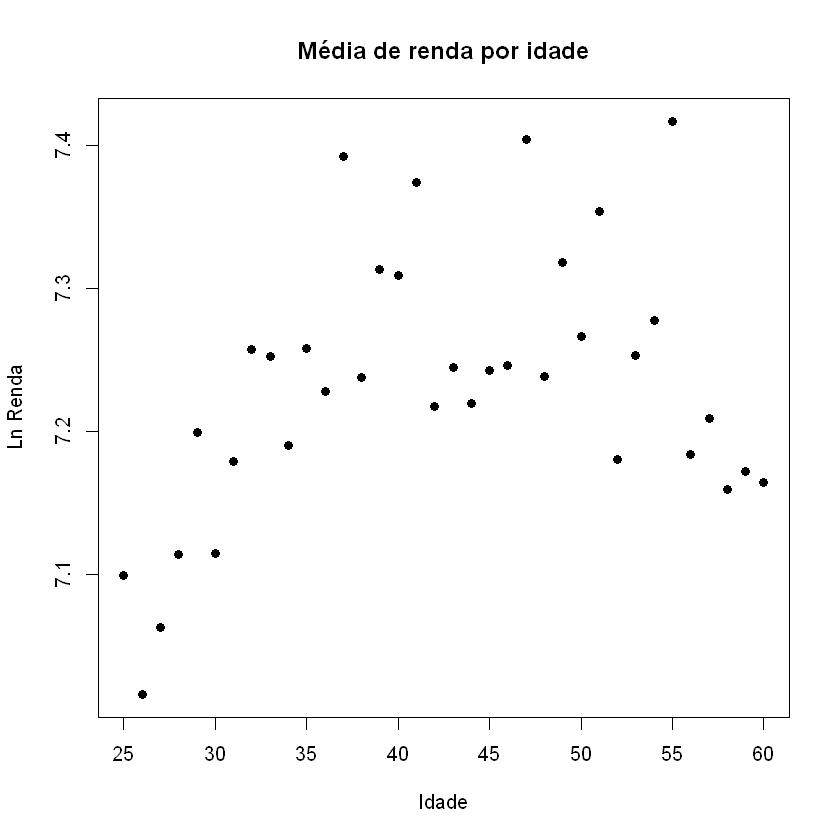

In [9]:
medias = sapply(25:60, function(x) mean(log(bd$VD4019[bd$V2009 == x]), na.rm=TRUE))
plot(25:60, medias, pch=19, main = "Média de renda por idade", ylab='Ln Renda', xlab='Idade')

Resposta Correta: **Letra D - A relação não é linear. Por isso, o modelo não é o mais adequado.**

É possível observar uma relação quadrática entre a idade e o log da renda. Desse modo, o modelo linear não é o mais adequado. Poderíamos usar um modelo polinomial para melhor se ajustar a esses dados.

---
#### 6) Acrescente no modelo anterior a idade centralizada ao quadrado. Podemos dizer que o ajuste do modelo melhorou?
a) Sim

b) Não

In [10]:
fit3 = lm(log(VD4019) ~ poly(idadecen, 2) + anosesco, data=bd)
summary(fit3)


Call:
lm(formula = log(VD4019) ~ poly(idadecen, 2) + anosesco, data = bd)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1074 -0.4250  0.0208  0.4896  3.1989 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.056951   0.025991 233.040  < 2e-16 ***
poly(idadecen, 2)1 17.223912   1.063880  16.190  < 2e-16 ***
poly(idadecen, 2)2 -5.332044   1.021642  -5.219 1.85e-07 ***
anosesco            0.113879   0.002328  48.911  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7978 on 6583 degrees of freedom
  (3413 observations deleted due to missingness)
Multiple R-squared:  0.2703,	Adjusted R-squared:   0.27 
F-statistic:   813 on 3 and 6583 DF,  p-value: < 2.2e-16


Reposta Correta: **Letra A - Sim.**

---
#### 7) Por quê?
a) Melhorou porque a distribuição do erro está muito mais próxima de uma distribuição normal do que antes

b) Melhorou porque o modelo não possui mais multicolinearidade

c) Melhorou porque a relação quadrática identificada entre o logaritmo da renda e a idade foi modelada o que aumentou o coeficiente de determinação

d) Não melhorou porque não houve mudança significativa nos gráficos de avaliação do modelo

e) Não melhorou porque a idade centralizada ao quadrado não possui efeito estatisticamente significante

Resposta Correta: **Letra C - Melhorou porque a relação quadrática identificada entre o logaritmo da renda e a idade foi modelada o que aumentou o coeficiente de determinação**.

---
Analisando cada uma das outras alternativas:

a) Vamos analisar a distribuição do erro dos dois modelos utilizando um gráfico de probabilidade normal.

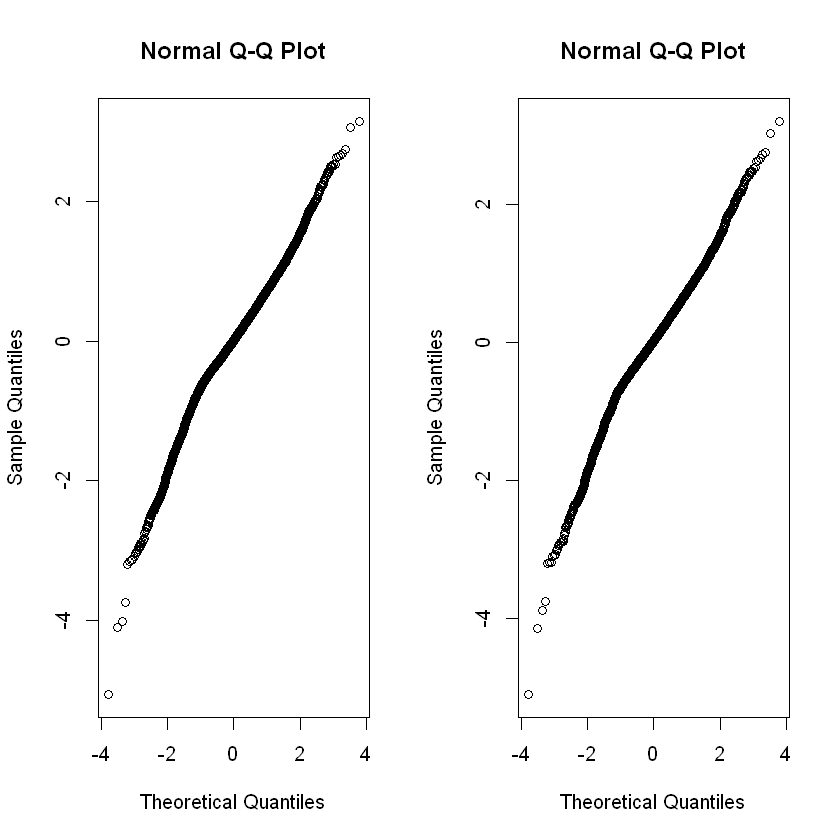

In [11]:
par(mfrow=c(1,2))
qqnorm(resid(fit2))
qqnorm(resid(fit3))
par(mfrow=c(1,1))

A distribuição do erro dos dois modelos parece bem satisfatória.

b) Vamos verificar a multicolinearidade dos modelos com a análise VIF:

In [12]:
print(vif(fit2))
print(vif(fit3))

idadecen anosesco 
 1.07435  1.07435 
                      GVIF Df GVIF^(1/(2*Df))
poly(idadecen, 2) 1.074416  2        1.018106
anosesco          1.074416  1        1.036541


Ambos os modelos não possuem multicolineariedade.

---
d) Os gráficos de avaliação não nos dizem nada sobre o poder explicativo de qualquer modelo. Apenas informam da qualidade do ajuste. 

---
e) Como podemos ver, a idade centralizada ao quadrado foi significante com um p-valor de $1.85 \cdot 10^{-7}$.